<div style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی اصفهان - دانشکده مهندسی برق و کامپیوتر
            </font>
			<p></p>
			<font color=blue>
مبانی یادگیری ماشین
            </font>
			<br />
			<br />
پاییز ۱۴۰۱
		</div>
		<hr/>
		<font color=red size=6>
			<br />
			<div align=center>	
تکلیف کامپیوتری اول
            </div>
		</font>
		<font color=green size=6>
			<br />
			<div align=center>	
علیرضا ابره فروش
            </div>
		</font>
		<font color=green size=6>
			<br />
			<div align=center>	
9816603
            </div>
		</font>
		<br />
		<hr />
		<style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>
	</font>
</div>

In [501]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [502]:
data = pd.read_csv("insurance.csv")

# 1

## الف

In [503]:
def costFunctionMSE(X, y, theta):
    m = len(y)
    result = (1 / (2 * m)) * np.sum((np.matmul(X, theta) - y) ** 2)
    return result

def generateBatch(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    num_batches = len(y) // batch_size
    for i in range(num_batches):
        mini_batch = data[i * batch_size: (i + 1) * batch_size]
        mini_batches.append(mini_batch)
    if len(y) % batch_size != 0:
        mini_batch = data[(i + 1) * batch_size:]
        mini_batches.append(mini_batch)
    return mini_batches

In [504]:
def BGD(X, y, theta, learning_rate = 0.01, num_epochs = 50):
    m = len(y)
    new_theta = theta.copy()
    cost_history = np.zeros(num_epochs)
    for i in range(num_epochs):
        new_theta = new_theta - (learning_rate / m) * np.matmul(np.transpose(X), (np.matmul(X, new_theta) - y))
        cost_history[i] = costFunctionMSE(X, y, new_theta)
    return new_theta, cost_history

def SGD(X, y, theta, learning_rate = 0.01, num_epochs = 50):
    new_theta = theta.copy()
    cost_history = np.zeros(num_epochs)
    for i in range(num_epochs):
        r = np.random.randint(0, len(y) - 1)
        new_theta = new_theta - (learning_rate) * (np.transpose(X[r]) * (np.matmul(X[r], new_theta) - y[r])).reshape(len(new_theta), 1)
        # new_theta = new_theta - (learning_rate) * np.matmul(np.transpose(X[r]), (np.matmul(X[r], new_theta) - y[r].reshape((len(y[r]), 1))))
        cost_history[i] = costFunctionMSE(X, y, new_theta)
    return new_theta, cost_history

def MBGD(X, y, theta, learning_rate = 0.01, num_epochs = 1, batch_size = 32):
    new_theta = theta.copy()
    cost_history = np.zeros(num_epochs * (len(y) // batch_size + 1))
    cnt = 0;
    for i in range(num_epochs):
        batches = generateBatch(X, y, batch_size)
        for batch in batches:
            X_batch, y_batch = batch[:, : -1], batch[:, -1]
            new_theta = new_theta - (learning_rate / batch_size) * np.matmul(np.transpose(X_batch), (np.matmul(X_batch, new_theta) - y_batch.reshape((len(y_batch), 1))))
            cost_history[cnt] = costFunctionMSE(X, y, new_theta)
            cnt += 1
    return new_theta, cost_history

In [505]:
# extract features and labels
X, y = data.iloc[:,:-1], data.iloc[:,-1]

# convert to numpy
X = X.to_numpy()
y = y.to_numpy()

# add a column with ones for the bias value while converting it into a matrix
X = np.column_stack(([1] * X.shape[0], X))

# rows and columns
m, n = X.shape

# initial theta
theta = np.zeros(shape = (n, 1))

[[  4.72413062]
 [215.11141388]
 [161.12537508]
 [  6.86413963]]


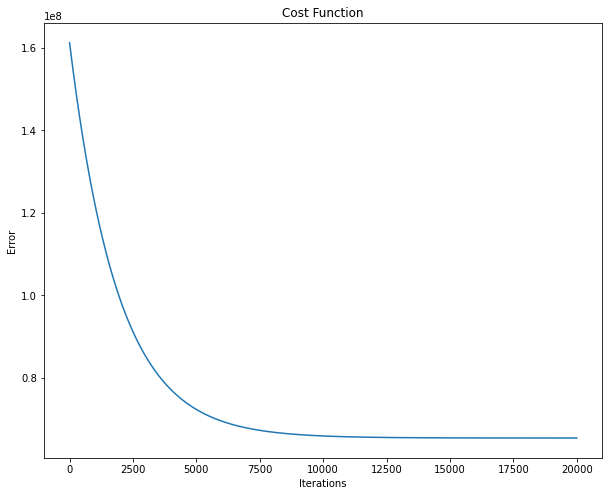

In [506]:
# run batch gradient descent
b_new_theta, b_cost_history =  BGD(X, y.reshape((len(y), 1)), theta, 0.0000001, 20000)
print(b_new_theta)

# plot costs
plt.figure(figsize = (10, 8))
plt.plot(b_cost_history)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
None

[[  4.66873475]
 [211.24199263]
 [159.04142681]
 [  6.72802654]]


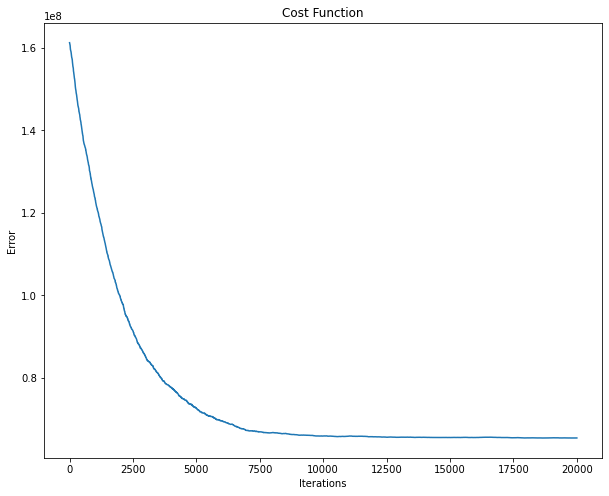

In [507]:
# run stochastic gradient descent
s_new_theta, s_cost_history =  SGD(X, y.reshape((len(y), 1)), theta, 0.0000001, 20000)
print(s_new_theta)

# plot costs
plt.figure(figsize = (10, 8))
plt.plot(s_cost_history)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
None

[[-11.82131504]
 [208.47017006]
 [171.44821111]
 [ 52.52823295]]


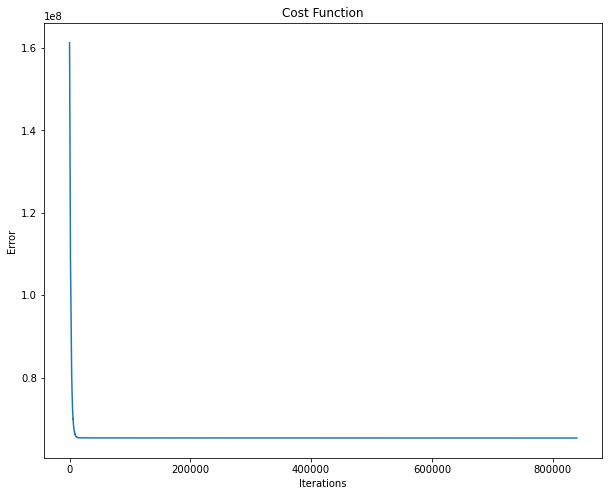

In [508]:
# run mini-batch gradient descent
m_new_theta, m_cost_history =  MBGD(X, y.reshape((len(y), 1)), theta, 0.0000001, 20000)
print(m_new_theta)

# plot costs
plt.figure(figsize = (10, 8))
plt.plot(m_cost_history)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
None

# ب

### Batch Gradient Descent
This is a type of gradient descent which processes all the training examples for each iteration of gradient descent. But if the number of training examples is large, then batch gradient descent is computationally very expensive. Hence if the number of training examples is large, then batch gradient descent is not preferred. Instead, we prefer to use stochastic gradient descent or mini-batch gradient descent.

### Stochastic Gradient Descent
This is a type of gradient descent which processes 1 training example per iteration. Hence, the parameters are being updated even after one iteration in which only a single example has been processed. Hence this is quite faster than batch gradient descent. But again, when the number of training examples is large, even then it processes only one example which can be additional overhead for the system as the number of iterations will be quite large.

### Mini Batch Gradient Descent
This is a type of gradient descent which works faster than both batch gradient descent and stochastic gradient descent. Here b examples where b<m (m be the number of training example)are processed per iteration. So even if the number of training examples is large, it is processed in batches of b training examples in one go. Thus, it works for larger training examples and that too with lesser number of iterations.



> reference: https://medium.com/@kumaranupam2020/difference-between-batch-gradient-descent-bgd-minibatch-gradient-descent-mgd-and-stochastic-657efcb4194b

In [509]:
print(np.min(b_cost_history))
print(np.min(s_cost_history))
print(np.min(m_cost_history))
print("**********************")
print(np.mean(b_cost_history))
print(np.mean(s_cost_history))
print(np.mean(m_cost_history))

65349056.8186628
65373656.31548054
65310711.18937938
**********************
74476473.13166896
74644607.4301855
65543956.96245596


With same number of epochs on minimum we have:

$Error_{Mini Batch Gradient Descent} \lt Error_{Stochastic Gradient Descent} \lt Error_{Batch Gradient Descent}$

and on average we have

$Error_{Mini Batch Gradient Descent} \lt Error_{Batch Gradient Descent} \lt Error_{Stochastic Gradient Descent}$

## ج

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-503-c9c0ff543531>:3: RuntimeWarning: overflow encountered in square
  result = (1 / (2 * m)) * np.sum((np.matmul(X, theta) - y) ** 2)
<ipython-input-504-9a5aaf81922c>:6: RuntimeWarning: overflow encountered in matmul
  new_theta = new_theta - (learning_rate / m) * np.matmul(np.transpose(X), (np.matmul(X, new_theta) - y))
<ipython-input-503-c9c0ff543531>:3: RuntimeWarning: invalid value encountered in matmul
  result = (1 / (2 * m)) * np.sum((np.matmul(X, theta) - y) ** 2)
<ipython-input-504-9a5aaf81922c>:6: RuntimeWarning: invalid value encountered in matmul
  new_theta = new_theta - (learning_rate / m) * np.matmul(np.transpose(X), (np.matmul(X, new_theta) - y))
<ipython-input-504-9a5aaf81922c>:6: RuntimeWarning: invalid value encountered in subtract
  new_theta = new_theta - (learning_rate / m)

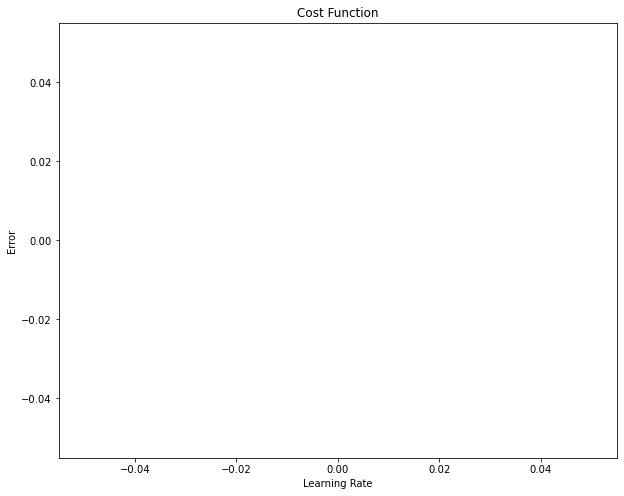

In [510]:
# run batch gradient descent
costs = np.zeros(200)
for i in range(1, 201):
    b_new_theta, b_cost_history =  BGD(X, y.reshape((len(y), 1)), theta, i / 1000, 2000)
    costs[i - 1] = np.mean(b_cost_history)
# plot costs
plt.figure(figsize = (10, 8))
plt.plot([i / 1000 for i in range(1, 201)], costs)
plt.title('Cost Function')
plt.xlabel('Learning Rate')
plt.ylabel('Error')
None

In the above interval ($\alpha \in \left[0.001, 0.2 \right] $) we see decreasing error

# د

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-503-c9c0ff543531>:3: RuntimeWarning: overflow encountered in square
  result = (1 / (2 * m)) * np.sum((np.matmul(X, theta) - y) ** 2)
<ipython-input-504-9a5aaf81922c>:6: RuntimeWarning: overflow encountered in matmul
  new_theta = new_theta - (learning_rate / m) * np.matmul(np.transpose(X), (np.matmul(X, new_theta) - y))
<ipython-input-503-c9c0ff543531>:3: RuntimeWarning: invalid value encountered in matmul
  result = (1 / (2 * m)) * np.sum((np.matmul(X, theta) - y) ** 2)
<ipython-input-504-9a5aaf81922c>:6: RuntimeWarning: invalid value encountered in matmul
  new_theta = new_theta - (learning_rate / m) * np.matmul(np.transpose(X), (np.matmul(X, new_theta) - y))
<ipython-input-504-9a5aaf81922c>:6: RuntimeWarning: invalid value encountered in subtract
  new_theta = new_theta - (learning_rate / m)

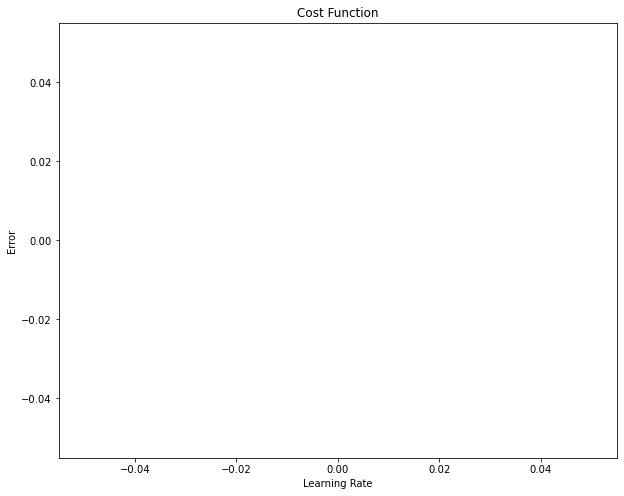

In [511]:
# run batch gradient descent
costs = np.zeros(200)
for i in range(1, 201):
    b_new_theta, b_cost_history =  BGD(X, y.reshape((len(y), 1)), theta, i / 100, 2000)
    costs[i - 1] = np.mean(b_cost_history)
# plot costs
plt.figure(figsize = (10, 8))
plt.plot([i / 100 for i in range(1, 201)], costs)
plt.title('Cost Function')
plt.xlabel('Learning Rate')
plt.ylabel('Error')
None

In the above interval ($\alpha \in \left[0.01, 2 \right] $) we see increasing error

### The learning rate
The learning rate hyperparameter controls the rate or speed at which the model learns. Specifically, it controls the amount of apportioned error that the weights of the model are updated with each time they are updated, such as at the end of each batch of training examples. Generally, a large learning rate allows the model to learn faster, at the cost of arriving on a sub-optimal final set of weights. A smaller learning rate may allow the model to learn a more optimal or even globally optimal set of weights but may take significantly longer to train.

> reference: https://www.andreaperlato.com/theorypost/the-learning-rate/

## ه-الف

In [512]:
# normalizing data
data = (data - data.min()) / (data.max() - data.min())

# extract features and labels
X, y = data.iloc[:,:-1], data.iloc[:,-1]

# convert to numpy
X = X.to_numpy()
y = y.to_numpy()

# add a column with ones for the bias value while converting it into a matrix
X = np.column_stack(([1] * X.shape[0], X))

# rows and columns
m, n = X.shape

# initial theta
theta = np.zeros(shape = (n, 1))

[[0.07682804]
 [0.15441822]
 [0.1011153 ]
 [0.03491516]]


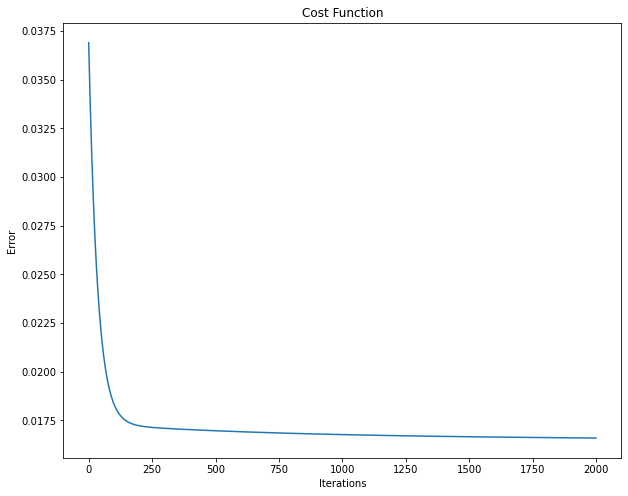

In [513]:
# run batch gradient descent
b_new_theta, b_cost_history =  BGD(X, y.reshape((len(y), 1)), theta, 0.01, 2000)
print(b_new_theta)

# plot costs
plt.figure(figsize = (10, 8))
plt.plot(b_cost_history)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
None

[[0.09164002]
 [0.15929819]
 [0.09379204]
 [0.01899963]]


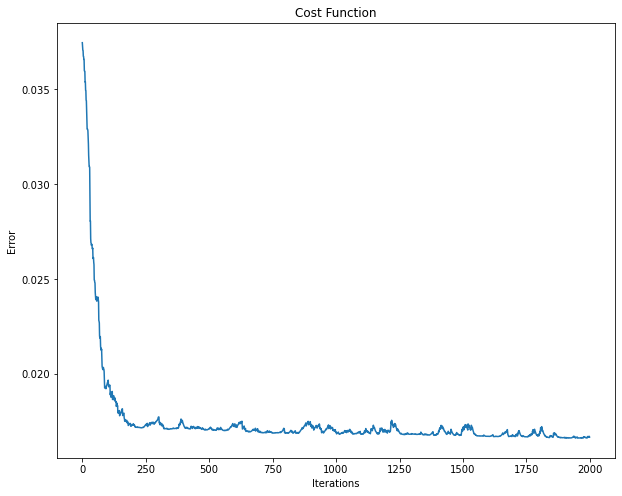

In [514]:
# run stochastic gradient descent
s_new_theta, s_cost_history =  SGD(X, y.reshape((len(y), 1)), theta, 0.01, 2000)
print(s_new_theta)

# plot costs
plt.figure(figsize = (10, 8))
plt.plot(s_cost_history)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
None

[[0.02572256]
 [0.17649375]
 [0.19719768]
 [0.04346421]]


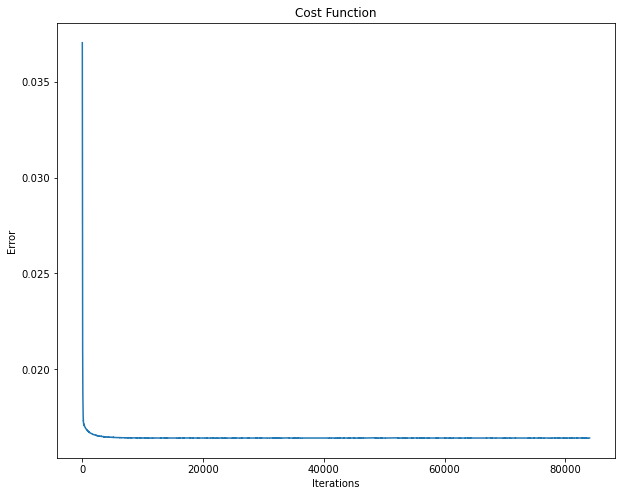

In [515]:
# run mini-batch gradient descent
m_new_theta, m_cost_history =  MBGD(X, y.reshape((len(y), 1)), theta, 0.01, 2000)
print(m_new_theta)

# plot costs
plt.figure(figsize = (10, 8))
plt.plot(m_cost_history)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
None

## ه-ب

### Batch Gradient Descent
This is a type of gradient descent which processes all the training examples for each iteration of gradient descent. But if the number of training examples is large, then batch gradient descent is computationally very expensive. Hence if the number of training examples is large, then batch gradient descent is not preferred. Instead, we prefer to use stochastic gradient descent or mini-batch gradient descent.

### Stochastic Gradient Descent
This is a type of gradient descent which processes 1 training example per iteration. Hence, the parameters are being updated even after one iteration in which only a single example has been processed. Hence this is quite faster than batch gradient descent. But again, when the number of training examples is large, even then it processes only one example which can be additional overhead for the system as the number of iterations will be quite large.

### Mini Batch Gradient Descent
This is a type of gradient descent which works faster than both batch gradient descent and stochastic gradient descent. Here b examples where b<m (m be the number of training example)are processed per iteration. So even if the number of training examples is large, it is processed in batches of b training examples in one go. Thus, it works for larger training examples and that too with lesser number of iterations.



> reference: https://medium.com/@kumaranupam2020/difference-between-batch-gradient-descent-bgd-minibatch-gradient-descent-mgd-and-stochastic-657efcb4194b

In [516]:
print(np.min(b_cost_history))
print(np.min(s_cost_history))
print(np.min(m_cost_history))
print("**********************")
print(np.mean(b_cost_history))
print(np.mean(s_cost_history))
print(np.mean(m_cost_history))

0.016588416768102278
0.01663787344012185
0.016426555091027997
**********************
0.017168513862564815
0.017522114464586805
0.016448769341062854


With same number of epochs on minimum and average we have:

$Error_{Mini Batch Gradient Descent} \lt Error_{Batch Gradient Descent} \lt Error_{Stochastic Gradient Descent}$

## و

In [517]:
model = LinearRegression()
model.fit(X = X, y = y)
print(model.coef_)

[0.         0.17621709 0.19702831 0.04332619]


The theta derived from mini-batch gradient descent is so close to the theta derived from `LinearRegression()`. But `LinearRegression()` is faster than the implemented mini-batch gradient descent.

## ز

In [518]:
def normalEquation(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [519]:
n_new_theta = normalEquation(X, y)
print(n_new_theta)

[0.02524933 0.17621709 0.19702831 0.04332619]


In [520]:
print(m_new_theta.T)
print(model.coef_)
print(n_new_theta)

[[0.02572256 0.17649375 0.19719768 0.04346421]]
[0.         0.17621709 0.19702831 0.04332619]
[0.02524933 0.17621709 0.19702831 0.04332619]


In [521]:
print(np.mean((X @ m_new_theta - y) ** 2))
print(np.mean((X @ model.coef_.T - y) ** 2))
print(np.mean((X @ n_new_theta.T - y) ** 2))

0.04183464275879182
0.03349063863832609
0.032853110158088304


Thetas are close to each other but errors on average are as below:

$Error_{Normal Equation} \lt Error_{LinearRegression (of sklearn)} \lt Error_{Mini Batch Gradient Descent}$

In [522]:
################################################################################################################################

# 2

## الف

In [523]:
def costFunctionMAE(X, y, theta):
    m = len(y)
    result = (1 / m) * np.sum(np.abs(np.matmul(X, theta) - y))
    return result

def SGDMAE(X, y, theta, learning_rate = 0.01, num_epochs = 50):
    new_theta = theta.copy()
    cost_history = np.zeros(num_epochs)
    for i in range(num_epochs):
        r = np.random.randint(0, len(y) - 1)
        new_theta = new_theta - (learning_rate) * (np.transpose(X[r]) * (np.matmul(X[r], new_theta) - y[r])).reshape(len(new_theta), 1)
        # new_theta = new_theta - (learning_rate) * np.matmul(np.transpose(X[r]), (np.matmul(X[r], new_theta) - y[r].reshape((len(y[r]), 1))))
        cost_history[i] = costFunctionMAE(X, y, new_theta)
    return new_theta, cost_history

In [524]:
# read data from csv file
data = pd.read_csv("insurance.csv")

# extract features and labels
X, y = data.iloc[:,:-1], data.iloc[:,-1]

# convert to numpy
X = X.to_numpy()
y = y.to_numpy()

# add a column with ones for the bias value while converting it into a matrix
X = np.column_stack(([1] * X.shape[0], X))

# rows and columns
m, n = X.shape

# initial theta
theta = np.zeros(shape = (n, 1))

# splitting data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 104, test_size = 0.20, shuffle=True)

### SGD with MSE

[[  5.15721481]
 [225.26795543]
 [179.97906465]
 [  7.98650747]]


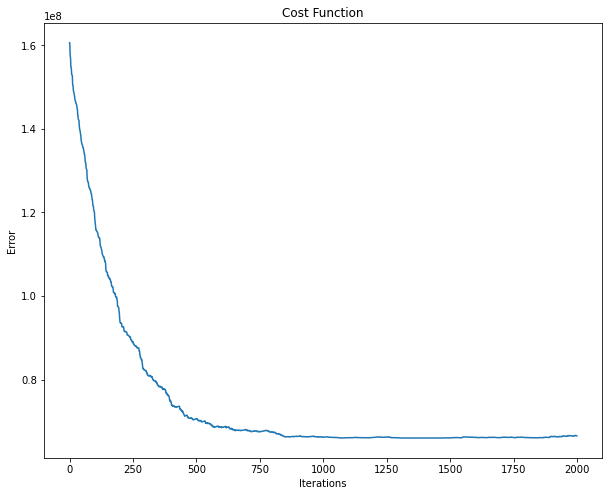

In [525]:
# run stochastic gradient descent
s_new_theta, s_cost_history =  SGD(X_train, y_train.reshape((len(y_train), 1)), theta, 0.000001, 2000)
print(s_new_theta)

# plot costs
plt.figure(figsize = (10, 8))
plt.plot(s_cost_history)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
None

### SGD with MAE

[[  4.70880221]
 [209.54985246]
 [161.33433741]
 [  8.74772619]]


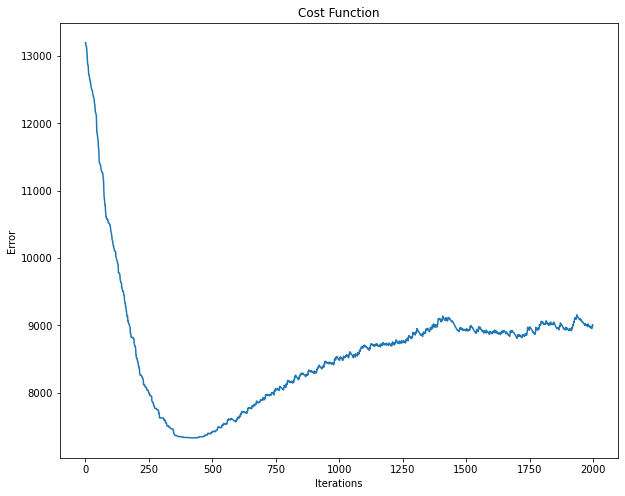

In [526]:
# run stochastic gradient descent
s_new_theta, s_cost_history =  SGDMAE(X_train, y_train.reshape((len(y_train), 1)), theta, 0.000001, 2000)
print(s_new_theta)

# plot costs
plt.figure(figsize = (10, 8))
plt.plot(s_cost_history)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
None

## ب

As we see more fluctuations occur in MAE-trained model rather MSE. The reason is MAE does not punish model for large errors, but MSE does. Specially when we are using such an stochastic algorithm that is vulnerable of being badly trained. So, as we see, the MSE does a smoother convergence than MAE. In following we have some descriptions on `MAE` and `MSE`:



`MAE`: you can use this when you have very few or no outliers in your data or in a better way when you want to ignore the outliers while fitting your model to your data.

`MSE/RMSE`: you use this when you have a large number of outliers in your data and want to accommodate them while fitting your model.

MAE will fit data on the basis of the median while MSE will fit the data on the basis of the average, and since we know that not always will the median be the same as the average, there is a certain error present which we call bias. This is highly not recommended as the data fitted according to MAE will be biased or have an error.

But like others have said, MSE is better when it comes to optimization but since you square the errors you can't really compare the two. Although one method possible is to divide the MSE by the average to get a percentage.


> reference: https://www.kaggle.com/c/home-data-for-ml-course/discussion/143364

## ج

In [527]:
# normalizing data
data = (data - data.min()) / (data.max() - data.min())

# extract features and labels
X, y = data.iloc[:,:-1], data.iloc[:,-1]

# convert to numpy
X = X.to_numpy()
y = y.to_numpy()

# add a column with ones for the bias value while converting it into a matrix
X = np.column_stack(([1] * X.shape[0], X))

# rows and columns
m, n = X.shape

# initial theta
theta = np.zeros(shape = (n, 1))

# splitting data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 104, test_size = 0.20, shuffle=True)

### ج-الف

[[0.08878649]
 [0.16800936]
 [0.09884198]
 [0.04998542]]


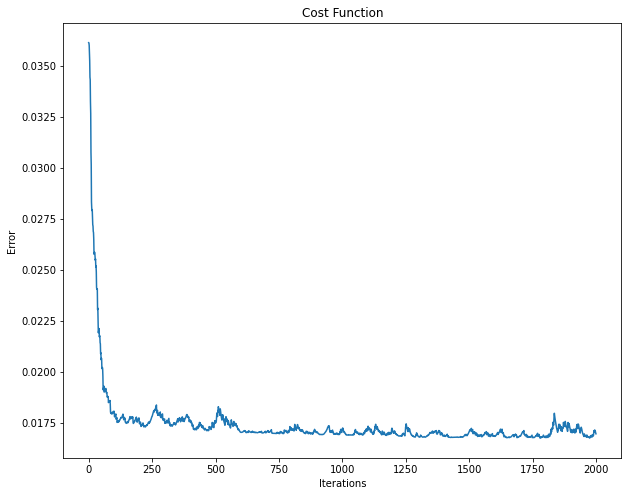

In [528]:
# run stochastic gradient descent
s_new_theta, s_cost_history =  SGD(X_train, y_train.reshape((len(y_train), 1)), theta, 0.01, 2000)
print(s_new_theta)

# plot costs
plt.figure(figsize = (10, 8))
plt.plot(s_cost_history)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
None

In [529]:
y_pred = X_test @ s_new_theta
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse)
print(mae)

0.03231172328491713
0.15299939878788538


### ج-ب

[[0.08295433]
 [0.1435037 ]
 [0.1165511 ]
 [0.02591717]]


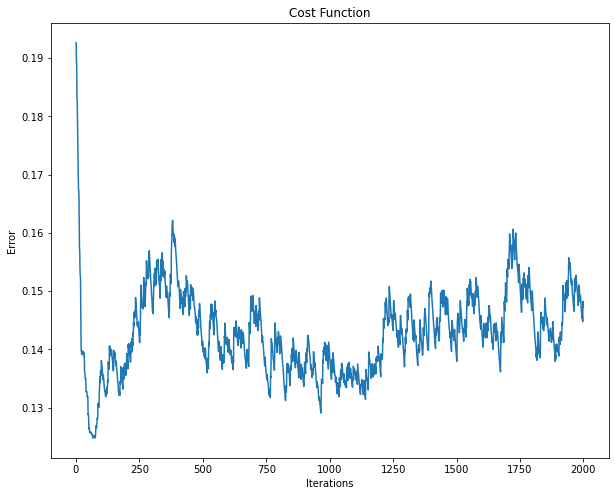

In [530]:
# run stochastic gradient descent
s_new_theta, s_cost_history =  SGDMAE(X_train, y_train.reshape((len(y_train), 1)), theta, 0.01, 2000)
print(s_new_theta)

# plot costs
plt.figure(figsize = (10, 8))
plt.plot(s_cost_history)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
None

In [531]:
y_pred = X_test @ s_new_theta
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse)
print(mae)

0.032038364466144734
0.1465718050483801


The model converges smoother and more accurate when data is normalized. Because the effect of each feature on model is somehow close.



Data normalization dramatically improves model accuracy.it gives equal weights/importance to each variable so that no single variable steers model performance in one direction just because they are bigger numbers.

As an example, clustering algorithms use distance measures to determine if an observation should belong to a certain cluster. “Euclidean distance” is often used to measure those distances. If a variable has significantly higher values, it can dominate distance measures, suppressing other variables with small values.

## د

In [532]:
sgdr = SGDRegressor()
sgdr.fit(X_train, y_train)

SGDRegressor()

In [533]:
y_pred = sgdr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [534]:
print(mse)
print(mae)

0.03291353455756735
0.1408368673711365
